In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors 
pio.templates.default = "plotly_white"
import re
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv(r"C:\Users\naveen\Downloads\Sample - Superstore.csv",encoding = 'latin-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Converting Date Columns

In [6]:
c = df.copy()

In [7]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
c['Order Date']=pd.to_datetime(c['Order Date'])
c['Order Day']=c[ 'Order Date'].dt.day
c['Order Month']=c['Order Date'].dt.month
c['order Year']=c['Order Date'].dt.year

In [9]:
c['Ship Date']=pd.to_datetime(c['Ship Date'])

In [10]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Monthly sales analysis

In [11]:
sales_by_month = c.groupby(['Order Month'])['Sales'].sum().reset_index()
fig = px.line(sales_by_month,x='Order Month',y='Sales',title='Monthly sales analysis')
fig.show()

# Analysis Sales By Category

In [12]:
sales_by_category = c.groupby(['Category'])['Sales'].sum().reset_index()


In [13]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [14]:
fig =px.pie(sales_by_category,values='Sales',names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis By Category',title_font=dict(size=24))
fig.show()

# Analysis sales by sub-category

In [15]:
sales_by_sub_category=c.groupby(['Sub-Category'])['Sales'].sum().reset_index()

In [16]:
fig =px.bar(sales_by_sub_category,x='Sub-Category',y='Sales',title='Analysis sales by sub-category')

fig.show()

# `Analysis profit by Month`

In [17]:
profit_by_month=c.groupby(['Order Month'])['Profit'].sum().reset_index()

In [18]:
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


In [19]:
fig=px.line(profit_by_month,x='Order Month',y='Profit',title='Analysis profit on sales')
fig.show()

# Profit by Category

In [20]:
profit_by_category=c.groupby(['Category'])['Profit'].sum().reset_index()

In [21]:
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [22]:
fig = px.pie(profit_by_category,values='Profit',names='Category',hole=0.2,color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Profit by Category',title_font=dict(size=22))
fig.show()

# Profit by Sub-Category

In [23]:
profit_by_subcategory=c.groupby(['Sub-Category'])['Profit'].sum().reset_index()

In [24]:
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


In [25]:
fig=px.bar(profit_by_subcategory,x='Sub-Category',y='Profit',title='Profit by Sub-Category')
fig.show()

# Sales and Profit-Customer segment

In [26]:
c.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Day,Order Month,order Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,10,2015


In [27]:
c['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [28]:
sales_profit_by_segment = c.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
color_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Sales'],name='Sales',marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Profit'],name='Profit',marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',xaxis_title='Customer Segment',yaxis_title='Amount')



# Sales to Profit

In [29]:
sales_profit_by_segment=c.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio']=sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


# `Analysis of Quantity Sold by Ship Mode`

In [31]:
c['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [36]:
quantity_by_mode=c.groupby(['Ship Mode'])['Quantity'].sum().reset_index()
quantity_by_mode

,Ship Mode,Quantity
0,First Class,5693
1,Same Day,1960
2,Second Class,7423
3,Standard Class,22797


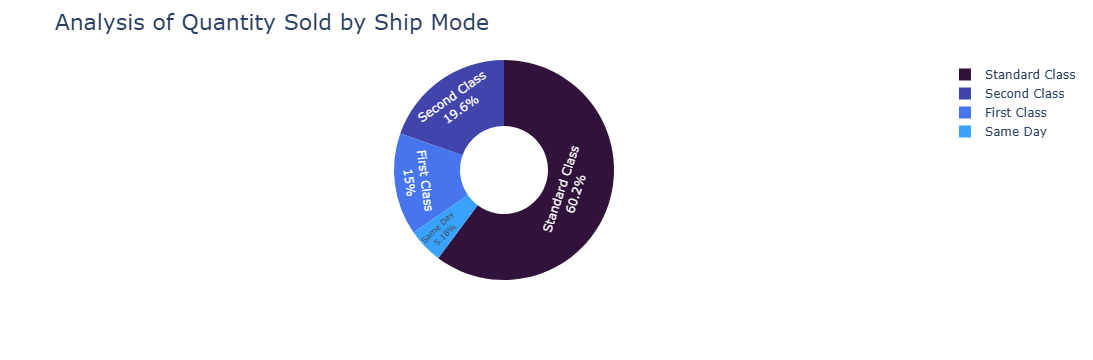

In [44]:
fig = px.pie(quantity_by_mode,values='Quantity',names='Ship Mode',hole=0.4,color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Analysis of Quantity Sold by Ship Mode',title_font=dict(size=22))
fig.show()